In [58]:
from itertools import combinations
from collections import namedtuple, defaultdict
from random import choice
from copy import deepcopy

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

State = namedtuple('State', ['x', 'o'])
MAGIC = [2, 7, 6,
         9, 5, 1,
         4, 3, 8]

def print_board(pos):
    """Nicely prints the board"""
    for r in range(3):
        for c in range(3):
            i = r * 3 + c
            if MAGIC[i] in pos.x:
                print('X', end='')
            elif MAGIC[i] in pos.o:
                print('O', end='')
            else:
                print('.', end='')
        print()
    print()
    
def win(elements):
    """Checks is elements is winning"""
    return any(sum(c) == 15 for c in combinations(elements, 3))

def state_value(pos: State):
    """Evaluate state: +1 first player wins"""
    if win(pos.x):
        return 1
    elif win(pos.o):
        return -1
    else:
        return 0

In [59]:
def initialize_Q_values(Q_values, state):
    if state not in Q_values:
        Q_values[state] = np.array([0.0]*9)
    return Q_values

In [60]:
def choose_action(Q_values, state):
    if state not in Q_values:
        Q_values = initialize_Q_values(Q_values, state)
    valid_actions = [i for i in range(9) if (i+1) not in state[0] and (i+1) not in state[1]]
    valid_q_values = [Q_values[state][i] for i in valid_actions]
    Q_max = np.max(valid_q_values)
    best_actions = [action for action, q_value in zip(valid_actions, valid_q_values) if q_value == Q_max]
    return np.random.choice(best_actions) + 1

In [63]:
def play_RL(Q_values, alpha, gamma):
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    
    while available:
        action_chosen = choose_action(Q_values, (frozenset(state.x), frozenset(state.o)))
        x = action_chosen
        state_next = deepcopy(state)
        state_next.x.add(x)
        trajectory.append(deepcopy(state_next))
        available.remove(x)
        reward = state_value(state_next)
        
      
        
        s = (frozenset(state.x), frozenset(state.o))
        n_s = (frozenset(state_next.x), frozenset(state_next.o))

        if s not in Q_values:
            Q_values = initialize_Q_values(Q_values, s)
        if n_s not in Q_values:
            Q_values = initialize_Q_values(Q_values, n_s)
        
        maxQ_next = np.max(Q_values[n_s])
        Q_values[s][action_chosen-1] = (1 - alpha) * Q_values[s][action_chosen-1] + alpha * (reward + gamma * maxQ_next)


        state = state_next

        if available:
            o = choice(list(available))
            state_next = deepcopy(state)
            state_next.o.add(o)
            trajectory.append(deepcopy(state_next))
            available.remove(o)

            action_chosen = o
            reward = state_value(state_next)
            
            s = (frozenset(state.x), frozenset(state.o))
            n_s = (frozenset(state_next.x), frozenset(state_next.o))

            if s not in Q_values:
                Q_values = initialize_Q_values(Q_values, s)
            if n_s not in Q_values:
                Q_values = initialize_Q_values(Q_values, n_s)
        
            maxQ_next = np.max(Q_values[n_s])
            Q_values[s][action_chosen-1] = (1 - alpha) * Q_values[s][action_chosen-1] + alpha * (reward + gamma * maxQ_next)

            
            
            state = state_next

        if win(state.x):
            return 1
        elif win(state.o):
            return -1

    return 0

In [72]:
import matplotlib.pyplot as plt

# Initialize variables to track wins, losses, and draws
num_games = 500000
rl_wins = 0
random_wins = 0
draws = 0

# Initialize Q values
Q_values = {}

# Run the games
for _ in tqdm(range(num_games)):
    # RL player plays first
    result = play_RL(Q_values, alpha=0.1, gamma=0.9)
    if result == 1:
        rl_wins += 1
    elif result == -1:
        random_wins += 1
    else:
        draws += 1



100%|██████████| 500000/500000 [04:25<00:00, 1880.66it/s]


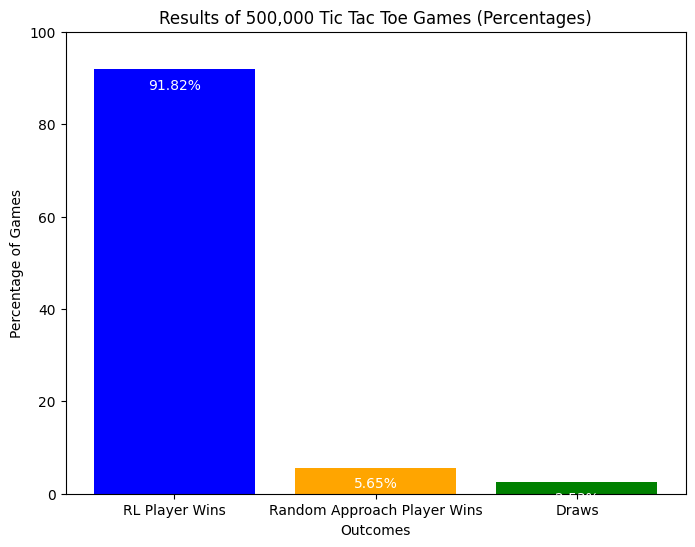

In [73]:
# Calculate percentages
total_games = rl_wins + random_wins + draws
rl_percentage = (rl_wins / total_games) * 100
random_percentage = (random_wins / total_games) * 100
draws_percentage = (draws / total_games) * 100

# Store results in a dictionary for plotting
results_dict = {
    'RL Player Wins': rl_percentage,
    'Random Approach Player Wins': random_percentage,
    'Draws': draws_percentage
}

# Plot the results
plt.figure(figsize=(8, 6))
bars = plt.bar(results_dict.keys(), results_dict.values(), color=['blue', 'orange', 'green'])
plt.title('Results of 500,000 Tic Tac Toe Games (Percentages)')
plt.xlabel('Outcomes')
plt.ylabel('Percentage of Games')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for percentages

# Annotate bars with percentage values
for bar, percentage in zip(bars, results_dict.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{percentage:.2f}%', 
             ha='center', va='bottom', color='white', fontsize=10)

plt.show()

Roles reversed

In [66]:
def reversed_RL(Q_values, alpha, gamma):
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    
    while available:
        x = choice(list(available))
        state_next = deepcopy(state)
        state_next.x.add(x)
        trajectory.append(deepcopy(state_next))
        available.remove(x)

        chosen_action = x
        reward = -state_value(state_next)


        s = (frozenset(state.x), frozenset(state.o))
        n_s = (frozenset(state_next.x), frozenset(state_next.o))

        if s not in Q_values:
            Q_values = initialize_Q_values(Q_values, s)
        if n_s not in Q_values:
            Q_values = initialize_Q_values(Q_values, n_s)
    
        maxQ_next = np.max(Q_values[n_s])
        Q_values[s][chosen_action-1] = (1 - alpha) * Q_values[s][chosen_action-1] + alpha * (reward + gamma * maxQ_next)
        state = state_next

        if available:
            chosen_action = choose_action(Q_values, (frozenset(state.x), frozenset(state.o)))

            o = chosen_action
            state_next = deepcopy(state)
            state_next.o.add(o)
            trajectory.append(deepcopy(state_next))
            available.remove(o)

            reward = -state_value(state_next)
            
        
            s = (frozenset(state.x), frozenset(state.o))
            n_s = (frozenset(state_next.x), frozenset(state_next.o))

            if s not in Q_values:
                Q_values = initialize_Q_values(Q_values, s)
            if n_s not in Q_values:
                Q_values = initialize_Q_values(Q_values, n_s)
        
            maxQ_next = np.max(Q_values[n_s])
            Q_values[s][chosen_action-1] = (1 - alpha) * Q_values[s][chosen_action-1] + alpha * (reward + gamma * maxQ_next)

            state = state_next

        if win(state.x):
            return 1
        elif win(state.o):
            return -1


    return 0

In [69]:
import matplotlib.pyplot as plt

# Initialize variables to track wins, losses, and draws
num_games = 500000
rl_wins = 0
random_wins = 0
draws = 0

# Initialize Q values
Q_values = {}

# Run the games
for _ in tqdm(range(num_games)):
    # RL player plays first
    result = reversed_RL(Q_values, alpha=0.1, gamma=0.9)
    if result == -1:
        rl_wins += 1
    elif result == 1:
        random_wins += 1
    else:
        draws += 1

100%|██████████| 500000/500000 [04:00<00:00, 2080.57it/s]


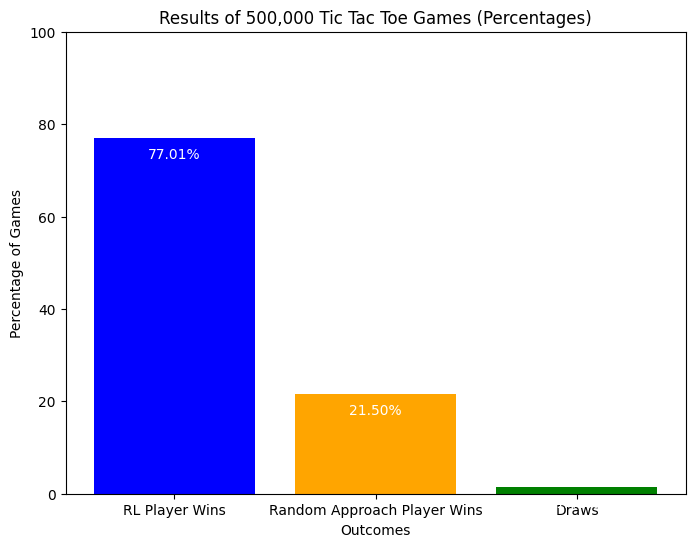

In [70]:
# Calculate percentages
total_games = rl_wins + random_wins + draws
rl_percentage = (rl_wins / total_games) * 100
random_percentage = (random_wins / total_games) * 100
draws_percentage = (draws / total_games) * 100

# Store results in a dictionary for plotting
results_dict = {
    'RL Player Wins': rl_percentage,
    'Random Approach Player Wins': random_percentage,
    'Draws': draws_percentage
}

# Plot the results
plt.figure(figsize=(8, 6))
bars = plt.bar(results_dict.keys(), results_dict.values(), color=['blue', 'orange', 'green'])
plt.title('Results of 500,000 Tic Tac Toe Games (Percentages)')
plt.xlabel('Outcomes')
plt.ylabel('Percentage of Games')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for percentages

# Annotate bars with percentage values
for bar, percentage in zip(bars, results_dict.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{percentage:.2f}%', 
             ha='center', va='bottom', color='white', fontsize=10)

plt.show()